# ALGORITMO DE EVOLUÇÃO DIFERENCIAL - ALOCAÇÃO DE NUTRIENTES

O algoritmo deve analisar as opções de alimentos e montar uma refeição com 30% de proteína, 15% de gordura e 55% de carboidratos.

In [185]:
# Mutação e crossing em um único passo
# Seleção se baseia na comparação entre vetor mutado e original
# Ideal para vetores com valores quebrados
# Hiperparametros - CR(PROB CROSSING), F(PESO DIFERENCIAL = MAGNITUDE DA MUTACAO/ O QUANTO É DIFERENTE DO ORIGINAL), NP(TAMANHO DA POPULAÇÃO)

In [186]:
# Gerar população inicial
# for indicando a quantidade de gerações
# usando for, para cada vetor X da população, criar um vetor vazio X+1. Escolher 3 outros vetores a, b e c diferentes de X.
# Para cada índice de X+1, gerar um valor aleatório(R) entre 0 e 1. 
# Se R < CR, X+1(i) = a(i) + F(b(i) - c(i))
# Se R >= CR, X+1(i) = X(i)
# Se fitness X+1 >= fitness X, X = X+1
# Se não, manter X na população

In [187]:
# A função objetiva/de avaliação/fitness irá analisar a diferença dos valores de carb, gordura e proteina dos vetores/indivíduos/pratos para os valores estipulados no enunciado do problema.
# O ALGORITMO IRÁ MINIMIZAR O VALOR DO ERRO TOTAL AO MÁXIMO 

In [188]:
import random
import matplotlib.pyplot as plt

F = 0.8 # Normalmente entre 0 e 2
CR = 0.3 # Normalmente entre 0 e 1

def gera_prato(): # GERA UM INDIVÍDUO
    alimentos = []
    for i in range(5):
        quant = random.randint(0,199) + random.random()
        alimentos.append(quant)
    return alimentos

In [189]:
gera_prato()

# Cada posição indica a quantidade de um alimento

[55.81198407874215,
 81.19891926768882,
 84.46786783155369,
 139.29998424348338,
 191.0951095978195]

In [190]:
def populacao(num):
  pop = []
  for i in range(num):
    pop.append(gera_prato())
  return pop

In [191]:
populacao(5) # GERANDO POPULAÇÃO COM 5 PRATOS/INDIVÍDUOS

[[85.28874153670223,
  129.85319549895397,
  46.296927289112276,
  76.40564967771117,
  104.07700955042787],
 [139.22157490055076,
  67.01167990783318,
  196.28795231140856,
  27.56590858363896,
  77.84516135391128],
 [20.14594381759599,
  156.79242145695613,
  175.91231645305515,
  143.15174558559428,
  195.7396317692955],
 [14.61202663913131,
  88.54256654557868,
  19.7583361477856,
  57.01729346891465,
  195.77701548524158],
 [166.63432725637773,
  135.94706279615002,
  185.7589765383152,
  91.39318004991433,
  145.36195051876652]]

### FUNÇÃO OBJETIVA/DE AVALIAÇÃO/FITNESS

In [192]:
def divergencia(prato,mostrar=False): # Os pesos a seguir são as porcentagens de carb, proteínas e lipídios em cada alimento
  carboidratos = prato[0]*0.05 + prato[1]*0.24 + prato[2]*0.26 + prato[3]*0.015 + prato[4]*0.29
  proteinas = prato[0]*0.23 + prato[1]*0.02 + prato[2]*0.026 + prato[3]*0.13 + prato[4]*0.095
  lipideos = prato[0]*0.05 + prato[1]*0.00 + prato[2]*0.01 + prato[3]*0.089 + prato[4]*0.014
  total = carboidratos + proteinas + lipideos
  soma = sum(prato)

  porcCarb = (carboidratos/total)*100
  porcProt = (proteinas/total)*100
  porcLip = (lipideos/total)*100

  difCarb = abs(porcCarb-55)
  difProt = abs(porcProt-30)
  difLip = abs(porcLip-15)

  if mostrar:
    print(porcCarb)
    print(porcProt)
    print(porcLip)
    print(soma)


  difTotal = difCarb + difProt + difLip

  return difTotal

### SELECIONA 3 OUTROS VETORES

In [193]:
def seleciona3(parental,populacao):
  p2 = []
  tres_vetores = []
  for v in populacao:
    if parental != v:
      p2.append(v) # Elimina o vetor parental/X da população
  for j in range(3):
    aleatorio = random.choice(p2)
    tres_vetores.append(aleatorio)
    p2.remove(aleatorio) # Remove os 3 vetores escolhidos para não serem selecinados de novo
  return tres_vetores

### MUTAÇÃO

In [194]:
def mutacao(vetorParental,tres):
  cont = 0
  A = tres[0]
  B = tres[1]
  C = tres[2]

  tentativa = []
  while cont < len(vetorParental):
    R = random.random()
    if R < CR:
      X = A[cont] + F*abs(B[cont]-C[cont])
      tentativa.append(X)
    else:
      tentativa.append(vetorParental[cont])
    cont += 1
  return tentativa

In [195]:
pop = [[1,2,3],[4,4,4],[5,2,1],[0,0,0],[7,8,9]]
parental = pop[0]
m = mutacao(parental,seleciona3(parental,pop))

print(parental)
print(m)
print(pop)

[1, 2, 3]
[1, 2, 3]
[[1, 2, 3], [4, 4, 4], [5, 2, 1], [0, 0, 0], [7, 8, 9]]


### MELHOR VETOR

In [196]:
def melhorVetor(pop):
  notas = []
  for i in pop:
    notas.append(divergencia(i))
  indice = notas.index(min(notas)) # SELECIONANDO O PRATO COM O MENOR ERRO
  return pop[indice]

In [197]:
pop1 = populacao(10)
melhor = melhorVetor(pop1)
print(pop1)
print(melhor)
print(divergencia(melhor))

[[68.55848282402555, 5.114549046626208, 106.75161689881821, 14.232374581201558, 89.3333316791769], [74.52663333225512, 141.65319234720283, 22.846899589000703, 167.98547358484853, 127.91109654356974], [195.33286226287825, 161.65084881072298, 39.956222564057576, 85.3826907647394, 100.99481874817855], [70.85848436054125, 130.09472993941202, 35.60652422537046, 182.16208785461558, 146.98980583557986], [149.5644627047689, 3.8372650256685854, 34.01339043146848, 107.53670773367806, 106.65479220253732], [23.632776542176085, 196.45639530818647, 139.44683307816413, 63.420968290135974, 21.8724892723681], [12.110892676168136, 24.631886204811053, 48.18916413926325, 40.143563820181605, 178.49214340849295], [97.12604942131138, 127.57982421972952, 47.79851853523223, 9.901262871499906, 123.2365978817053], [152.06686577223255, 177.89390524605585, 98.23536706879396, 136.59181387577792, 65.75118861222985], [50.79073064482099, 163.47798217295997, 77.16881212938995, 59.839506126297046, 122.63034337916942]]
[

# ALGORITMO

Melhor vetor: [70.98742840861665, 162.89639085624083, 114.45790868035269, 189.78404342138634, 98.85692749038586]
Valor de fitness: 4.9675791131197595

Melhor vetor: [45.27850662989742, 121.63753716114437, 163.6217338646003, 251.4641869804575, 119.29331325105632]
Valor de fitness: 2.2492922146153234

Melhor vetor: [45.27850662989742, 121.63753716114437, 163.6217338646003, 251.4641869804575, 119.29331325105632]
Valor de fitness: 2.2492922146153234

Melhor vetor: [45.27850662989742, 121.63753716114437, 163.6217338646003, 251.4641869804575, 119.29331325105632]
Valor de fitness: 2.2492922146153234

Melhor vetor: [45.27850662989742, 121.63753716114437, 163.6217338646003, 251.4641869804575, 119.29331325105632]
Valor de fitness: 2.2492922146153234

Melhor vetor: [45.27850662989742, 121.63753716114437, 163.6217338646003, 251.4641869804575, 119.29331325105632]
Valor de fitness: 2.2492922146153234

Melhor vetor: [45.27850662989742, 121.63753716114437, 163.6217338646003, 251.4641869804575, 119.293

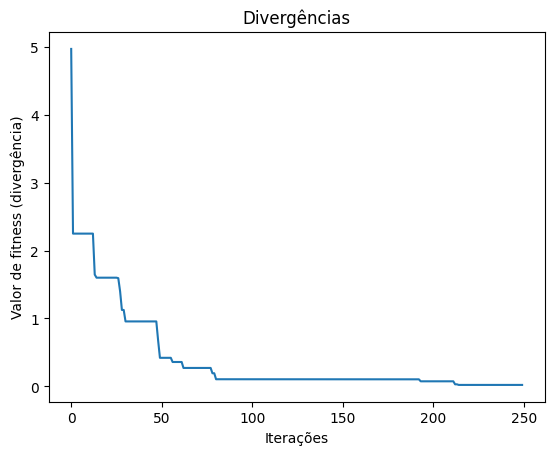

In [198]:
population = populacao(50)
melhores = []

for i in range(250):
  for j in population: # MUTAÇÃO SERÁ FEITA EM CADA PRATO DA POPULAÇÃO
    tres = seleciona3(j,population)
    trial = mutacao(j,tres)
    if divergencia(trial) < divergencia(j): # SALVANDO NA POPULAÇÃO SEMPRE OS PRATOS COM MENORES ERROS
      population.remove(j)
      population.append(trial)
  print(f'Melhor vetor: {melhorVetor(population)}')
  print(f'Valor de fitness: {divergencia(melhorVetor(population))}')
  melhores.append(divergencia(melhorVetor(population)))
  print()

plt.plot(melhores)
plt.title('Divergências')
plt.xlabel('Iterações')
plt.ylabel('Valor de fitness (divergência)')
plt.show()

# Se quer uma solução para 100 g de alimento, basta somar os valores de cada alimento em um vetor e dividir 100 por esse valor. 
# Depois cada alimento do vetor deve ser dividido pelo valor da divisão anterior.


In [199]:
melhor_vetor_ultima_geracao = melhorVetor(population)
print(melhor_vetor_ultima_geracao)
divergencia(melhorVetor(population), mostrar=True)

[199.1119808026947, 855.0008275385546, 867.1967429259525, 1434.871402658338, 312.80779887577137]
54.996726238598505
30.011203313041857
14.992070448359641
3668.9887528013114


0.022406626083711245